# First look at the Allstate claims competition data

In [2]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

* Load train data:

In [3]:
data = pd.read_csv("data/train.csv")

* Shape:

In [4]:
data.shape

(188318, 132)

* 6 first rows:

In [5]:
pd.set_option('display.max_columns', None)
data.head(n = 6)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87


* Short description:

In [6]:
data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


* Does the dataset contain any missing value ?

In [7]:
data.isnull().any().any()

False

* Label of each column:

In [8]:
print data.columns.values

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

* Drop the id column:

In [9]:
data.drop("id", axis = 1, inplace=True)

* Type of variables stored in our dataset:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 188.2+ MB


* Label encoder:

In [11]:
d = defaultdict(preprocessing.LabelEncoder)
data.iloc[:,:116] = data.iloc[:,:116].apply(lambda x: d[x.name].fit_transform(x))

* Print categories as well as number of labels in each category:

In [12]:
for k in d:
    print d[k].classes_, len( d[k].classes_ )

['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B'] 2
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'I' 'J' 'L' 'N' 'O' 'Q' 'R' 'S' 'U' 'V' 'W'
 'X'] 19
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'W' 'X'] 23
['AA' 'AB' 'AC' 'AD' 'AE' 'AF' 'AG' 'AH' 'AJ' 'AK' 'AL' 'AM' 'AN' 'AO' 'AP'
 'AR' 'AS' 'AT' 'AU' 'AV' 'AW' 'AX' 'AY' 'B' 'BA' 'BB' 'BC' 'BD' 'BF' 'BG'
 'BI' 'BK' 'BL' 'BM' 'BO' 'BP' 'BQ' 'BS' 'BT' 'BU' 'BV' 'BW' 'BX' 'BY' 'C'
 'CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG' 'CH' 'CI' 'CJ' 'CK' 'CL' 'CM' 'CN' 'CO'
 'CP' 'CQ' 'CR' 'CS' 'CT' 'CU' 'CV' 'CW' 'CX' 'CY' 'D' 'DA' 'DC' 'DD' 'DE'
 'DF' 'DG' 'DH' 'DI' 'DJ' 'DK' 'DL' 'DM' 'DN' 'DO' 'DP' 'DQ' 'DR' 'DS' 'DT'
 'DU' '

* Highest correlations between variables:

In [22]:
c = data.corr().abs()

#Set sup diag and diag to zero to avoid double display of correlations
rm = np.argwhere(np.tri( *c.as_matrix().shape, k = -1 ) == 0)
rm = map(tuple, rm)
for r in rm:
    c.iloc[r] = 0

s = c.unstack()
#s = s.loc[ s[::-1].index.get_level_values(0) != s[::-1].index.get_level_values(1) ] could have used this to rm diag
so = s.sort_values(kind="quicksort")
so[::-1].head(20)

cont11  cont12    0.994384
cat3    cat90     0.955738
cat7    cat89     0.955504
cat2    cat9      0.932420
cont1   cont9     0.929912
cat6    cat50     0.925731
cat104  cat116    0.918193
cat86   cont13    0.909188
cat8    cat102    0.900799
cat115  cont13    0.896327
cat86   cat98     0.886774
cont6   cont10    0.883351
cat8    cat66     0.862231
cat98   cont13    0.858652
cat116  cont12    0.850465
cat86   cat115    0.850152
cat104  cont6     0.844630
cat116  cont11    0.839529
cat4    cat111    0.829929
cat107  cat115    0.829241
dtype: float64

* Highest correlations with loss:

In [13]:
c = data.corrwith( data.loc[:,'loss'] ).abs()
so = c.sort_values(kind="quicksort")
so[::-1].head(20)

loss      1.000000
cat80     0.473257
cat79     0.441172
cat101    0.352646
cat87     0.346311
cat57     0.316736
cat12     0.311080
cat10     0.282162
cat7      0.280216
cat89     0.267107
cat81     0.259191
cat2      0.229665
cat72     0.228227
cat11     0.225347
cat1      0.222105
cat13     0.221970
cat9      0.221870
cat3      0.193180
cat16     0.191076
cat90     0.189789
dtype: float64

* Make a directory to save plots:

In [14]:
#Dossier
if not os.path.exists("plots"):
    os.makedirs("plots")  

### All distributions  
* One plot for each variables, saved in a folder:

In [15]:
#Tout les histogrammes
if not os.path.exists("plots/all"):
    os.makedirs("plots/all")

for col in data.columns :
    data.loc[:,col].hist( bins = 50 )
    plt.xlabel( col )
    plt.savefig("plots/all/" + col + ".png")
    plt.close()

* Target variable (loss) distribution :

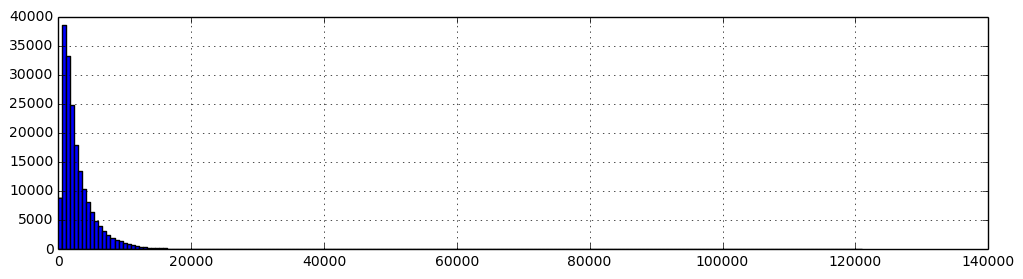

In [16]:
data.loc[:, 'loss'].hist(bins=200, figsize=(12, 3))

* Use y log scale to see the tail:

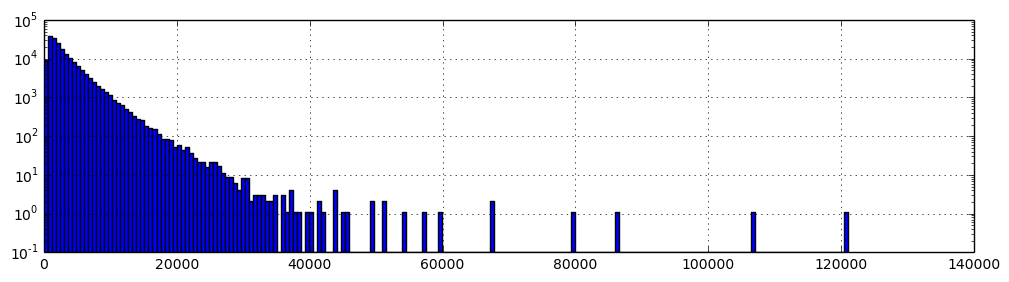

In [17]:
data.loc[:, 'loss'].hist( bins=200, figsize=(12, 3), log = True, bottom=0.1 )

* Insurance claims are expected to follow probability distributions belonging to the exponential family, moreover the distribution is clearly skewed:

In [18]:
print data.loc[:, 'loss'].skew()

3.79495837754


* Let's log tranform it !

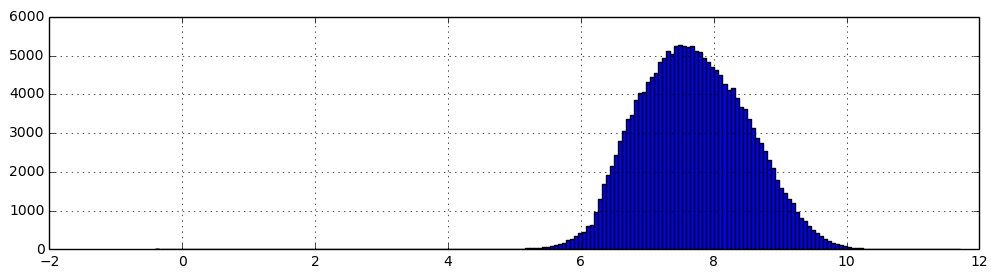

In [103]:
def target_transform(y):
    return np.log(y)

def target_inv_transform(y):
    return np.exp(y)

data['logloss'] = data.loc[:, 'loss'].apply( target_transform )
data.loc[:, 'logloss'].hist(bins=200, figsize=(12, 3))

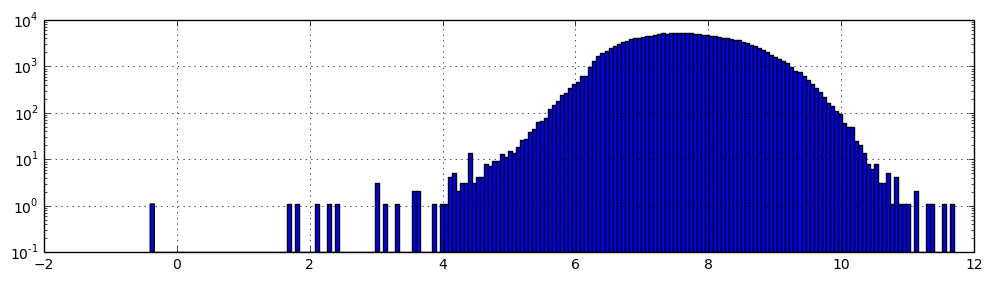

In [20]:
data.loc[:, 'logloss'].hist( bins=200, figsize=(12, 3), log = True, bottom=0.1 )

* Skewness after transformation:

In [102]:
print data.loc[:, 'logloss'].skew()

0.0959200802006


* In this challenge we are asked to minimize the MAE, while xgboost has no direct way to do this (it needs the hessian). Unfortunately mean loss is different from median loss:

In [36]:
print 'loss mean:', data.loc[:, 'loss'].mean()
print 'loss median:', data.loc[:, 'loss'].median()

loss mean: 3037.33768567
loss median: 2115.57


* But if we succeed to turn our target into a distribution where $mean \sim median$ :

In [38]:
print 'logloss mean:', data.loc[:, 'logloss'].mean()
print 'logloss median:', data.loc[:, 'logloss'].median()

logloss mean: 7.68526784285
logloss median: 7.65707955871


* Then by minimizing the RMSE on the transformed target we will be close to minimizing MAE on our original target:

In [40]:
print 'inv logloss mean:', target_inv_transform( data.loc[:, 'logloss'].mean() )
print 'loss median:', data.loc[:, 'loss'].median()

inv logloss mean: 2176.05273572
loss median: 2115.57


* One figure with all the other distrubutions as subplots, displayed here :

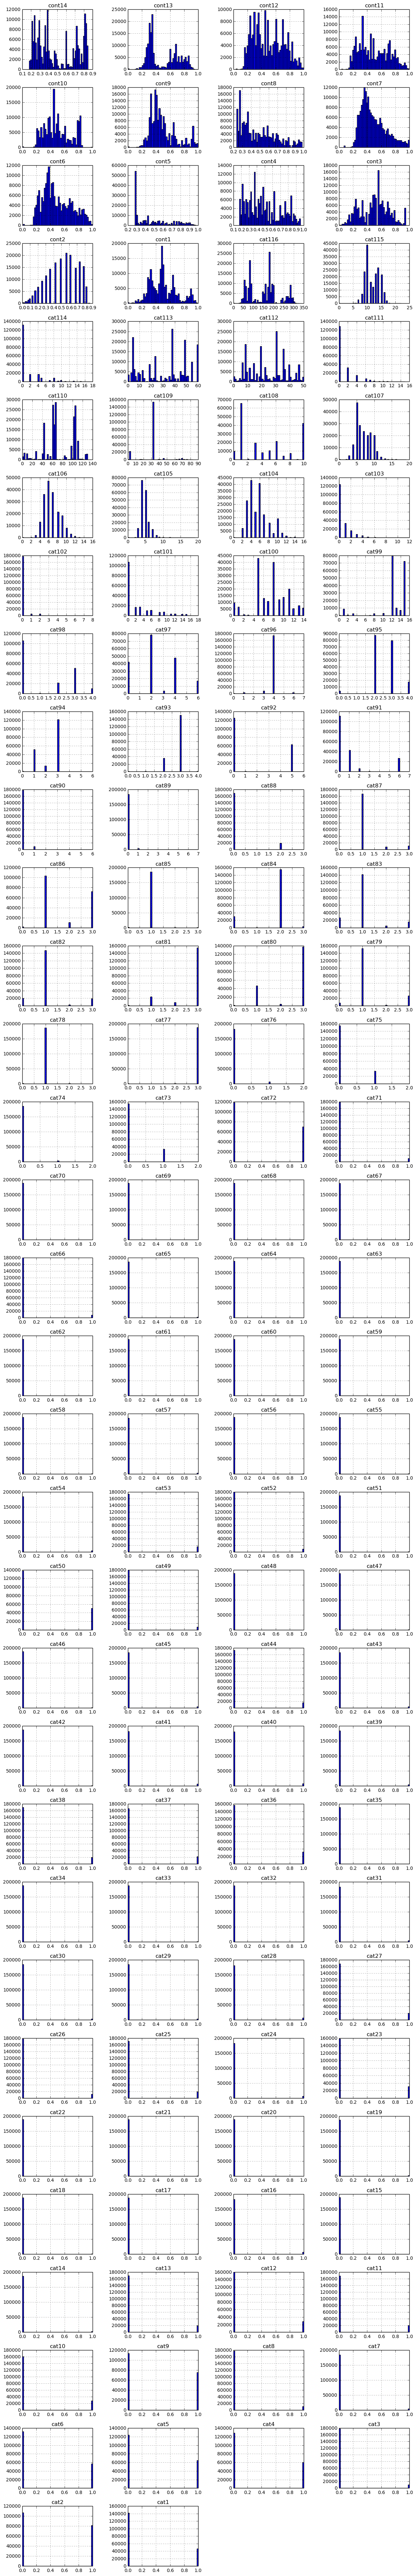

In [22]:
import math

n_cols = 4
n_rows = int( math.ceil( data.columns.size/float(n_cols) ) )

f,a = plt.subplots( nrows=n_rows, ncols=n_cols,figsize=(15, 3*n_rows) )
f.subplots_adjust(hspace = .3, wspace=.5)

#Hide all subplots since some may remain empty on the last row
for i in xrange(n_rows):
    for j in xrange(n_cols):
        a[i, j].axis('off')

#Reversed iterator to print cont variables first since binary ones are quite boring
col = reversed( data.columns[:-2] )
for i in xrange(n_rows):
    for j in xrange(n_cols):
        c = next(col, None)
        if not c : break
        a[i, j].axis('on')
        data.loc[:, c].hist( ax = a[i,j], bins = 50 )
        a[i,j].set_title(c)

### Loss versus all other variables: 2D distributions

* Saved in a folder

In [23]:
from matplotlib.colors import LogNorm

if not os.path.exists("plots/2D"):
    os.makedirs("plots/2D")

loss = data.loc[:,'loss'].as_matrix()
for col in data.columns :
    plt.figure()
    plt.hist2d(data.loc[:,col].as_matrix(), loss, bins=[40,50],  norm=LogNorm() )
    plt.ylabel('loss')
    plt.xlabel( col )
    plt.colorbar()
    plt.savefig("plots/2D/" + col + ".png")
    plt.close()

* Displayed here as subplots:

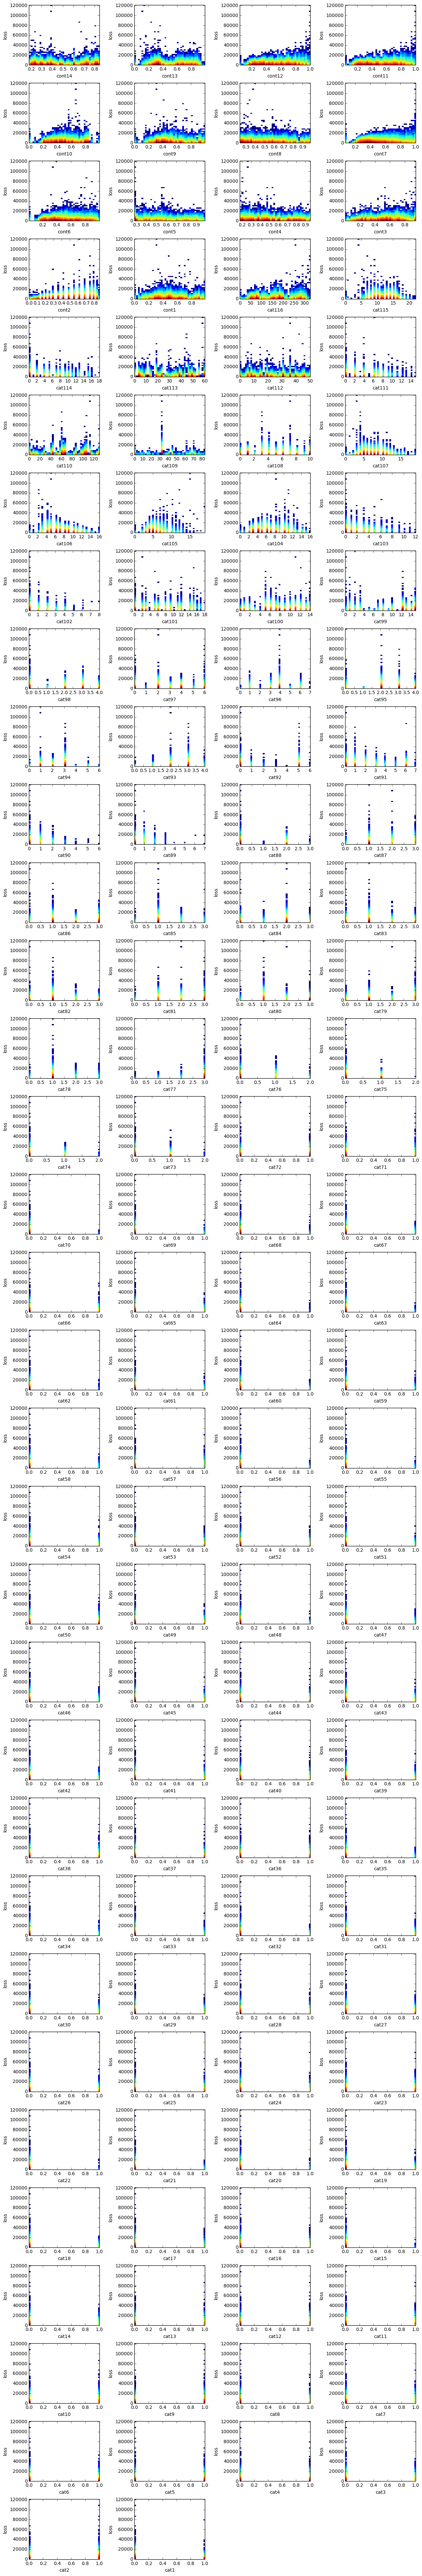

In [24]:
import math

n_cols = 4
n_rows = int( math.ceil( data.columns.size/float(n_cols) ) )

f,a = plt.subplots( nrows=n_rows, ncols=n_cols,figsize=(15, 3*n_rows) )
f.subplots_adjust(hspace = .3, wspace=.5)

#Hide all subplots since some may remain empty on the last row
for i in xrange(n_rows):
    for j in xrange(n_cols):
        a[i, j].axis('off')

#Reversed iterator to print cont variables first since binary ones are quite boring
col = reversed( data.columns[:-2] )
for i in xrange(n_rows):
    for j in xrange(n_cols):
        c = next(col, None)
        if not c : break  
        a[i, j].axis('on')
        a[i,j].hist2d(data.loc[:,c].as_matrix(), loss, bins=[40,50],  norm=LogNorm() )
        a[i,j].set_ylabel('loss')
        a[i,j].set_xlabel( c )

* Not easy to see something interesting on this, let's plot:  

### Loss mean and median versus all other variables  

* In a folder:

In [25]:
if not os.path.exists("plots/mean_median"):
    os.makedirs("plots/mean_median")

for col in data.columns :

    #Make histogram just to have the binning (and total for sem)
    hist, xedges = np.histogram(data.loc[:,col].as_matrix(), bins=50)
        
    #Compute median and mean, could have used list comprehension without this <= at the end :(
    N = len(hist)
    mean = np.zeros(N)
    median = np.zeros(N)
    std = np.zeros(N)
    for k in xrange(N):
        if k + 1 == N:
            binned_loss = data.loc[ (data.loc[:, col]>=xedges[k]) & (data.loc[:, col]<=xedges[k+1]), 'loss']
        else:
            binned_loss = data.loc[ (data.loc[:, col]>=xedges[k]) & (data.loc[:, col]<xedges[k+1]), 'loss']
                
        mean[k] = binned_loss.mean()
        median[k] = binned_loss.median()
        std[k] = binned_loss.std()
        
    sem = std/np.sqrt(hist)
    
    plt.figure()
    
    w = np.diff(xedges)
    plt.bar(xedges[:-1], mean, w, label='mean', color='g', yerr=sem)
    plt.bar(xedges[:-1], median, w, label='median', color='r')
    
    plt.ylabel('loss')
    plt.xlabel( col )
    plt.legend( loc='best' )
    
    plt.savefig("plots/mean_median/" + col + ".png")
    plt.close()

* Displayed here:

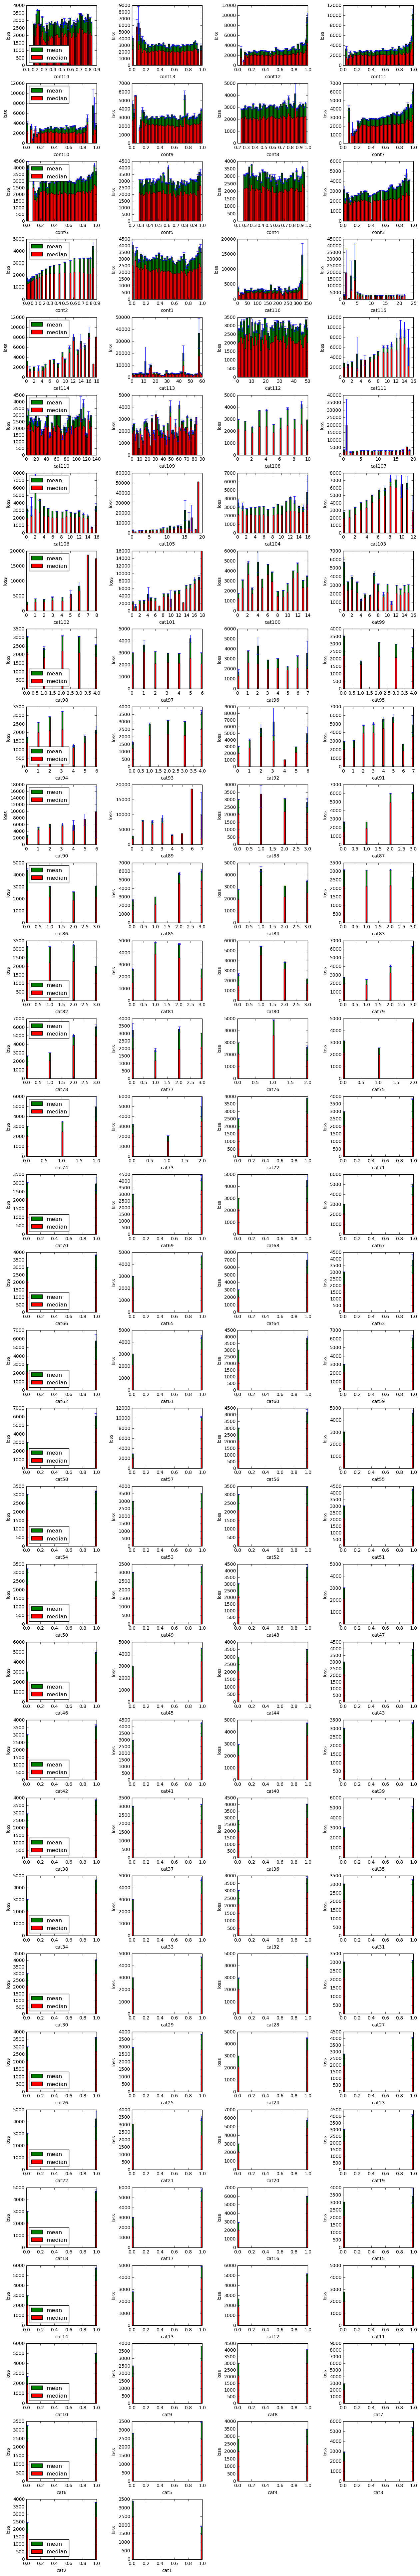

In [26]:
import math

n_cols = 4
n_rows = int( math.ceil( data.columns.size/float(n_cols) ) )

f,a = plt.subplots( nrows=n_rows, ncols=n_cols,figsize=(15, 3*n_rows) )
f.subplots_adjust(hspace = .3, wspace=.5)

#Hide all subplots since some may remain empty on the last row
for i in xrange(n_rows):
    for j in xrange(n_cols):
        a[i, j].axis('off')

#Reversed iterator to print cont variables first since binary ones are quite boring
col = reversed( data.columns[:-2] )
for i in xrange(n_rows):
    for j in xrange(n_cols):
        c = next(col, None)
        if not c : break  
        a[i, j].axis('on')
        
        #Make histogram just to have the binning (and total for sem)
        hist, xedges = np.histogram(data.loc[:,c].as_matrix(), bins=50)
        
        #Compute median and mean, could have list comprehension without this <= at the end :(
        N = len(hist)
        mean = np.zeros(N)
        median = np.zeros(N)
        std = np.zeros(N)
        for k in xrange(N):
            if k + 1 == N:
                binned_loss = data.loc[ (data.loc[:, c]>=xedges[k]) & (data.loc[:, c]<=xedges[k+1]), 'loss']
            else:
                binned_loss = data.loc[ (data.loc[:, c]>=xedges[k]) & (data.loc[:, c]<xedges[k+1]), 'loss']
                
            mean[k] = binned_loss.mean()
            median[k] = binned_loss.median()
            std[k] = binned_loss.std()
            
        sem = std/np.sqrt(hist)
            
        #Width of bins
        w = np.diff(xedges)
        
        #Plot
        a[i,j].bar(xedges[:-1], mean, w, label='mean', color='g', yerr=sem)
        a[i,j].bar(xedges[:-1], median, w, label='median', color='r')
        a[i,j].set_ylabel('loss')
        a[i,j].set_xlabel( c )
    
    #One legend by row
    a[i, 0].legend( loc='best' )